<a href="https://colab.research.google.com/github/waghmarerupvant4/my_projects/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries

import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

In [ ]:
# Uploading tain dataset

from google.colab import files
uploaded= files.upload()

Saving train.csv to train.csv


In [ ]:
#Loading data as Training and Testing sets

train_data=pd.read_csv('/content/train.csv')

In [ ]:
#Displaying Training Data
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Checking columns with missing data
Miss_Percent=100*(train_data.isnull().sum()/len(train_data))

#Sorting the data columns by their percentage in descending order
Miss_Percent=Miss_Percent[Miss_Percent>0].sort_values(ascending=False).round(1)

#Creating a dataframe to show percentage of missing data and its respective data column in table
DataFrame=pd.DataFrame(Miss_Percent)
miss_percent_table=DataFrame.rename(columns={0:'% of Missing Values'})
MissPercent=miss_percent_table

#Displaying Missing Value table
MissPercent

,% of Missing Values
PoolQC,99.5
MiscFeature,96.3
Alley,93.8
Fence,80.8
FireplaceQu,47.3
LotFrontage,17.7
GarageYrBlt,5.5
GarageType,5.5
GarageFinish,5.5
GarageQual,5.5


In [ ]:
#Dropping Columns with more than 80% missing values and ID because ID will not have bigger
#impact predicting the sales price 
train_data=train_data.drop(['Id','Alley','PoolQC','MiscFeature','Fence'],axis=1)

Checking and filling missing data columns

In [ ]:
#Checking Fireplace column
train_data['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
#Replacing Null value in FirePlaceQu with None
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('None')
train_data['FireplaceQu']

0       None
1         TA
2         TA
3         Gd
4         TA
        ... 
1455      TA
1456      TA
1457      Gd
1458    None
1459    None
Name: FireplaceQu, Length: 1460, dtype: object

In [ ]:
#Checking LotFrontage column
train_data['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [ ]:
#Replacing Null Values in LotFrontage with median
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].median())

In [ ]:
#Checking GarageCond column
train_data['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
#Replacing Null value in GarageCond with None
train_data['GarageCond']=train_data['GarageCond'].fillna('None')

In [ ]:
#Checking GarageQual column
train_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [ ]:
#Replacing the null value with none in GarageQual
train_data['GarageQual']=train_data['GarageQual'].fillna('None')

In [ ]:
#Checking GarageFinish Column
train_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [ ]:
#Replacing the Null value with None
train_data['GarageFinish']=train_data['GarageFinish'].fillna('None')

In [ ]:
#Checking GarageYrBlt column
train_data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

In [ ]:
#Replacing the Null Value with 
train_data['GarageYrBlt']=train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].median())

In [ ]:
#Checking Garage Type column
train_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [ ]:
#Replacing Null Value with None
train_data['GarageType']=train_data['GarageType'].fillna('None')

In [ ]:
#Checking BsmtFinType2 column
train_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
#Replacing Null value with None
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna('None')

In [ ]:
#Checking BsmtFinType1 column
train_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
#Replacing Null Value with None
train_data['BsmtFinType1']=train_data['BsmtFinType1'].fillna("None")

In [ ]:
#Checking BsmtExposure Column
train_data['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
#Replacing null value with None
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna('None')

In [ ]:
#Checking BsmtCond Column
train_data['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
#Replacing Null Value with None
train_data['BsmtCond']=train_data['BsmtCond'].fillna('None')

In [ ]:
#Checking BsmtQual column
train_data['BsmtQual'].unique()


array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
#Replacing Null value with None
train_data['BsmtQual']=train_data['BsmtQual'].fillna('None')

In [ ]:
#Checking MasVnrArea column
train_data['MasVnrArea'].unique()

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [ ]:
#Repalcing Null value with Zero(0)
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(0)

In [ ]:
#Checking MasVnrType Column
train_data['MasVnrType'].unique()


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [ ]:
#Replacing Null value with Others as there already is a value called None
train_data['MasVnrType']=train_data['MasVnrArea'].fillna("Others")

In [ ]:
#Checking Electrical column
train_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [ ]:
#Replacing the Null value with None
train_data['Electrical']=train_data['Electrical'].fillna('None')

In [ ]:
train_data.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


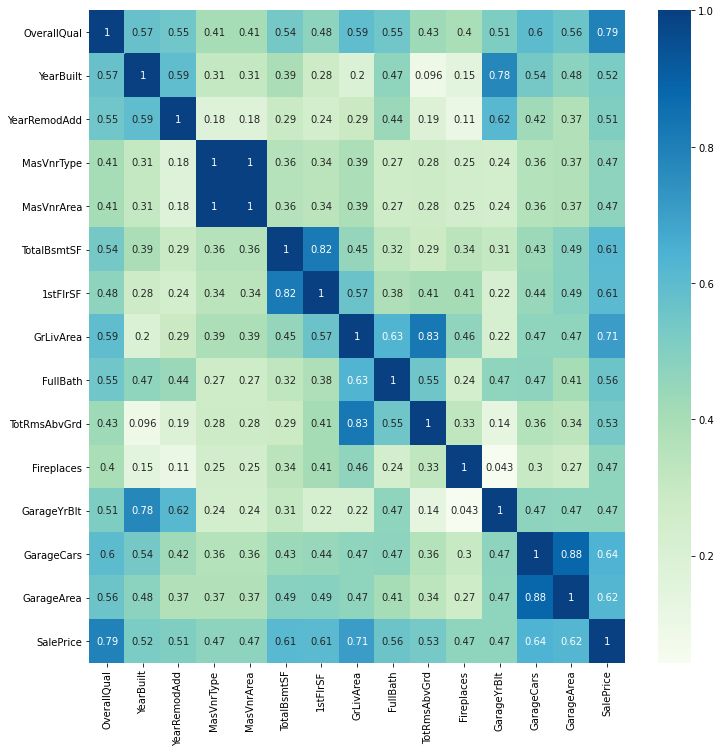

In [ ]:
#Calculating Correlation 
correlation=train_data.corr()
Positive_Related=correlation.index[abs(correlation["SalePrice"])>0.4]

#Plotting the Correlation in HeatMap for the data columns which has correlation value more than 0.4
plt.figure(figsize=(12,12))
Corr_Heatmap=sns.heatmap(train_data[Positive_Related].corr(),annot=True,cmap="GnBu")

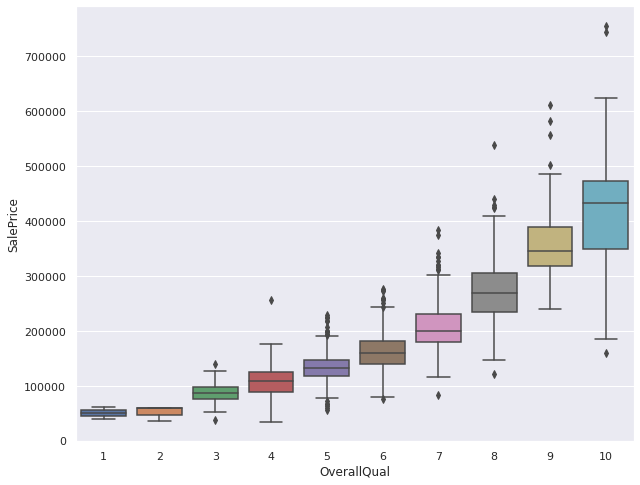

In [ ]:
# Checking for outliers

#BoxPlot for OverallQual Column
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(x='OverallQual',y='SalePrice',data=train_data)

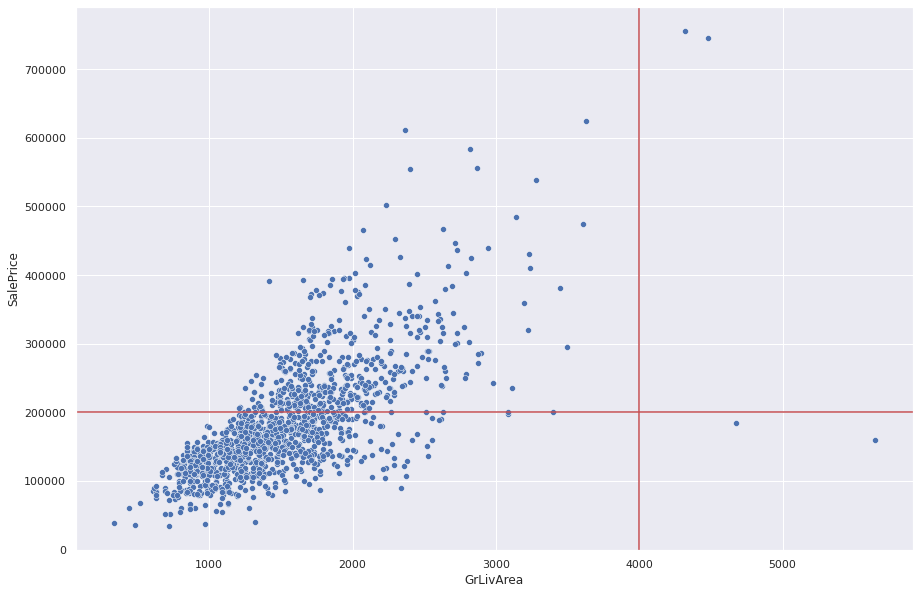

In [ ]:
#ScatterPlot for GrtLivArea
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_data)
plt.axhline(y=200000,color='r')
plt.axvline(x=4000,color='r')

In [ ]:
#Deleting Outliers
train_data=train_data.drop(train_data[(train_data['GrLivArea']>4000)&(train_data['SalePrice']>300000)].index)

# Model Preparation

In [ ]:
#Converting String into Number
new_train_data=train_data.apply(lambda x:pd.factorize(x)[0])


In [ ]:
#Allocating training set and testing set
X=new_train_data.drop('SalePrice',axis=1)
y=train_data['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1458, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into Train and Test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 99)

# Building Models 
## Random forest regressor

In [ ]:
#Building and Training the Model and Displaying the Score of the Model
model=RandomForestRegressor(n_estimators=50)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))

0.9668894761465696


In [ ]:
#Making predictions on test set 
Y_predict=model.predict(X_test)
len(Y_predict)

365

In [ ]:
#Creating Dataframe to store the Ids with Prediction
output=pd.DataFrame({'Actual':y_test,'Predicted':Y_predict})
print(output)

      Actual  Predicted
57    196500  203631.02
1332  100000  122844.66
436   116000  119539.16
697   123500  145033.52
1366  193000  227362.36
...      ...        ...
1185  104900  136465.18
213   156000  140337.00
534   178000  249045.52
1261  128900  121095.60
1010  135000  130813.00

[365 rows x 2 columns]


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
yt_test = sm.add_constant(y_test)
model_RFXT = sm.OLS(Y_predict, yt_test).fit()

#display adjusted R-squared
adj_R2=model_RFXT.rsquared_adj
print('Adjusted R_sq : %f' %adj_R2)

Adjusted R_sq : 0.803176


## Linear regressor

In [ ]:
linearModel=LinearRegression()
linearModel.fit(X_train, y_train)
print(linearModel.score(X_train,y_train))

0.6388086487424888


In [ ]:
#making prediction using Linear Model
Linear_predict=linearModel.predict(X_test)

In [ ]:
#Creating Dataframe to store the Ids with Prediction
linear_output=pd.DataFrame({'Actual':y_test,'Predicted':Linear_predict})
print(linear_output)

      Actual      Predicted
57    196500  192782.597859
1332  100000  204073.056055
436   116000  111888.355959
697   123500   69716.165124
1366  193000  240122.667504
...      ...            ...
1185  104900  116927.217260
213   156000  180118.924817
534   178000  244725.324749
1261  128900  142858.822300
1010  135000  144070.545847

[365 rows x 2 columns]


In [ ]:

model_LR = sm.OLS(Linear_predict, yt_test).fit()

#display adjusted R-squared
adjLR_R2=model_LR.rsquared_adj
print('Adjusted R_sq : %f' %adjLR_R2)

Adjusted R_sq : 0.645969


## Lasso regressor

In [ ]:
# Lasso regressor

#Building the Model in Lasso Regression Model
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(X_train,y_train)
print(lasso_model.score(X_train,y_train))

#Testing the Model
lasso_predict=lasso_model.predict(X_test)

#Creating dataframe to store ID with prediction
lasso_output=pd.DataFrame({'Actual':y_test,'Predicted':lasso_predict})
print(lasso_output)

0.6388085750234489
      Actual      Predicted
57    196500  192783.692952
1332  100000  204079.088236
436   116000  111892.577634
697   123500   69730.209480
1366  193000  240122.438130
...      ...            ...
1185  104900  116929.844061
213   156000  180145.213390
534   178000  244723.434171
1261  128900  142859.729336
1010  135000  144068.590975

[365 rows x 2 columns]


In [ ]:
model_LSR = sm.OLS(lasso_predict, yt_test).fit()

#display adjusted R-squared
adjLSR_R2=model_LSR.rsquared_adj
print('Adjusted R_sq : %f' %adjLSR_R2)

Adjusted R_sq : 0.645965
